In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import sharpy.utils.plotutils as pu 
from IPython.display import Image

import sharpy
import sharpy.sharpy_main as sharpy_main
import sharpy.utils.algebra as algebra

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
route_to_case = '../../../../sharpy/cases/coupled/simple_HALE/'
%run '../../../../sharpy/cases/coupled/simple_HALE/generate_hale_custom.py'

!ls ../../../../sharpy/cases/coupled/simple_HALE/

__init__.py	      generate_hale_custom.py	      simple_HALE.fem.h5
__pycache__	      generate_hale_custom_krylov.py  simple_HALE.sharpy
generate_hale.py      output
generate_hale_SPI.py  simple_HALE.aero.h5


<Figure size 640x480 with 0 Axes>

In [21]:
case_data = sharpy_main.main(['', route_to_case + 'simple_HALE.sharpy'])

--------------------------------------------------------------------------------
            ######  ##     ##    ###    ########  ########  ##    ##
           ##    ## ##     ##   ## ##   ##     ## ##     ##  ##  ##
           ##       ##     ##  ##   ##  ##     ## ##     ##   ####
            ######  ######### ##     ## ########  ########     ##
                 ## ##     ## ######### ##   ##   ##           ##
           ##    ## ##     ## ##     ## ##    ##  ##           ##
            ######  ##     ## ##     ## ##     ## ##           ##
--------------------------------------------------------------------------------
Aeroelastics Lab, Aeronautics Department.
    Copyright (c), Imperial College London.
    All rights reserved.
    License available at https://github.com/imperialcollegelondon/sharpy
Running SHARPy from /home/sh2323/sharpy/docs/source/content/example_notebooks
SHARPy being run is in /home/sh2323/sharpy/venv/lib/python3.12/site-packages
The branch being run is main
Th

/home/sh2323/sharpy/venv/lib/python3.12/site-packages/sharpy/aero/utils/uvlmlib.py:213: RuntimeWarning:

invalid value encountered in divide



|   1   | 0.0167 |  1   |   0.835610   |   0.924514   |  -4.651277   |-1.499192e+01 |-4.916130e-01 |
|   2   | 0.0333 |  1   |   0.848646   |   0.862542   |  -5.150704   |-1.499187e+01 |-4.917576e-01 |
|   3   | 0.0500 |  1   |   0.835815   |   0.790861   |  -5.320601   |-1.499183e+01 |-4.919165e-01 |
|   4   | 0.0667 |  1   |   0.852358   |   0.772787   |  -5.378974   |-1.499180e+01 |-4.920152e-01 |
|   5   | 0.0833 |  1   |   0.831155   |   0.922507   |  -5.277873   |-1.499177e+01 |-4.920152e-01 |
|   6   | 0.1000 |  1   |   0.846646   |   1.071057   |  -5.200207   |-1.499174e+01 |-4.919559e-01 |
|   7   | 0.1167 |  1   |   0.838124   |   0.926091   |  -5.203098   |-1.499172e+01 |-4.919142e-01 |
|   8   | 0.1333 |  1   |   0.853228   |   0.777068   |  -5.241557   |-1.499170e+01 |-4.919204e-01 |
|   9   | 0.1500 |  1   |   0.851493   |   0.783747   |  -5.375795   |-1.499168e+01 |-4.919493e-01 |
|  10   | 0.1667 |  1   |   0.859636   |   0.768769   |  -5.550735   |-1.499167e+01 |-4.919

In [22]:
analysis_mode = 1
# mode 0 ---> tools for static analysis and tools for stability analysis
# mode 1 ---> tools for dynamic analysis
# mode 2 ---> tools for stability analysis


In [23]:
if analysis_mode == 0:
    pu.plot_timestep(case_data,-1,21,plotly=True,custom_scaling=False)
    node_sequence = np.size(case_data.structure.timestep_info[-1].pos[:,0])
    #print(case_data.structure.timestep_info[-1].pos)
    print('Number of nodes in the structure: ', node_sequence)
    tip_node = np.argmax(case_data.structure.ini_info.pos[:, 1])
    #print('Tip node: ', tip_node)
    #print('Initial position of the tip node: ', case_data.structure.ini_info.pos[tip_node, :])
    #print('Final position of the tip node: ', case_data.structure.timestep_info[-1].pos[tip_node, :])
    tip_def = case_data.structure.timestep_info[-1].pos[tip_node, 2] - case_data.structure.ini_info.pos[tip_node, 2]
    tip_chord = 0.25
    print('Wingtip deflection (m): ', tip_def)
    print('Wingtip deflection (% chord): ', tip_def*100/tip_chord)
    
    root_node = 0
    for i in range(0,node_sequence-1):
        if (case_data.structure.ini_info.pos[i,0] == case_data.structure.ini_info.pos[tip_node,0]) and (case_data.structure.ini_info.pos[i,1] == 0):
            root_node = i
    #print('Root node: ', root_node)
    
    wing_plot_nodes = []
    wing_plot_nodes.append(root_node)
    for i in range(0,node_sequence):
        if (case_data.structure.ini_info.pos[i,0] == case_data.structure.ini_info.pos[tip_node,0]) and (case_data.structure.ini_info.pos[i, 1] > 0):
            wing_plot_nodes.append(i)
    #print(wing_plot_nodes)
    wing_def_rec = case_data.structure.timestep_info[-1].pos[wing_plot_nodes, 2] - case_data.structure.ini_info.pos[wing_plot_nodes, 2]

    

    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    ax.plot(case_data.structure.ini_info.pos[wing_plot_nodes, 1],wing_def_rec,marker='o')
    fig.suptitle('Spanwise Deflection of the Wing in Trimmed S.L.F.')
    ax.set_xlabel('Spanwise Location [m]')
    ax.set_ylabel('Vertical Displacement [m]')
    plt.show()


    

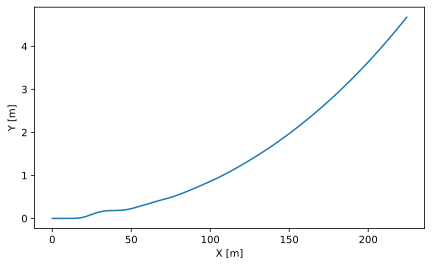

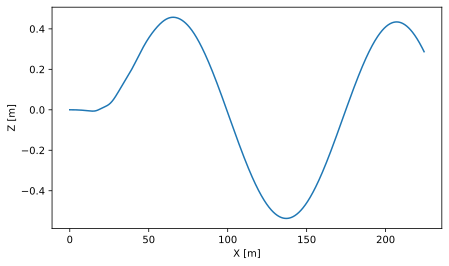

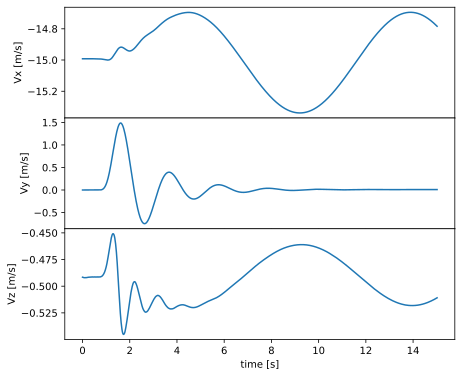

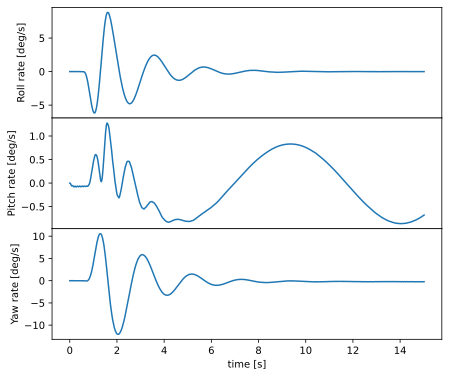

Wing tip node is the maximum Y one:  24


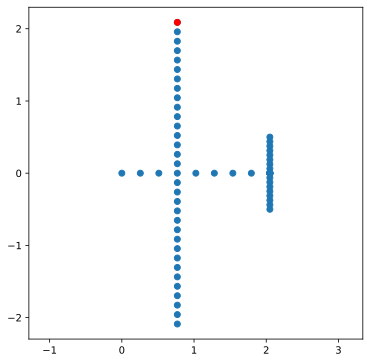

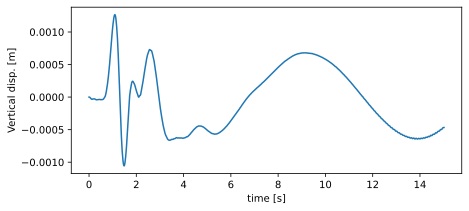

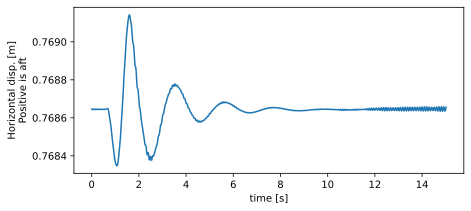

Root Node Index:  3


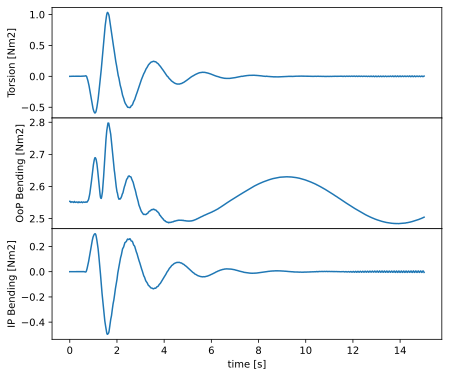

In [25]:
if analysis_mode == 1:


    fig, ax = plt.subplots(1, 1, figsize=(7, 4))

    # extract information
    n_tsteps = len(case_data.structure.timestep_info)
    xz = np.zeros((n_tsteps, 2))
    for it in range(n_tsteps):
        xz[it, 0] = -case_data.structure.timestep_info[it].for_pos[0] # the - is so that increasing time -> increasing x
        xz[it, 1] = case_data.structure.timestep_info[it].for_pos[1]
    ax.plot(xz[:, 0], xz[:, 1])
    #fig.suptitle('Lateral trajectory of the T-Tail model in a 10% 1-cos gust encounter')
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    plt.show()


    fig, ax = plt.subplots(1, 1, figsize=(7, 4))

    for it in range(n_tsteps):
        xz[it, 0] = -case_data.structure.timestep_info[it].for_pos[0] # the - is so that increasing time -> increasing x
        xz[it, 1] = case_data.structure.timestep_info[it].for_pos[2]
    ax.plot(xz[:, 0], xz[:, 1])
    #fig.suptitle('Longitudinal trajectory of the T-Tail model in a 10% 1-cos gust encounter')
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Z [m]')
    plt.show()

    fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
    ylabels = ['Vx [m/s]', 'Vy [m/s]', 'Vz [m/s]']

    # extract information
    n_tsteps = len(case_data.structure.timestep_info)
    dt = case_data.settings['DynamicCoupled']['dt']
    time_vec = np.linspace(0, n_tsteps*dt, n_tsteps)
    for_vel = np.zeros((n_tsteps, 3))
    for it in range(n_tsteps):
        for_vel[it, 0:3] = case_data.structure.timestep_info[it].for_vel[0:3]
        
    for idim in range(3):
        ax[idim].plot(time_vec, for_vel[:, idim])
        ax[idim].set_ylabel(ylabels[idim])
        
    ax[2].set_xlabel('time [s]')
    plt.subplots_adjust(hspace=0)
    #fig.suptitle('Linear RBM velocities. T-Tail model in a 10% 1-cos gust encounter');
    # ax.set_xlabel('X [m]')
    # ax.set_ylabel('Z [m]');
    plt.show()


    fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
    ylabels = ['Roll rate [deg/s]', 'Pitch rate [deg/s]', 'Yaw rate [deg/s]']

    # extract information
    n_tsteps = len(case_data.structure.timestep_info)
    dt = case_data.settings['DynamicCoupled']['dt']
    time_vec = np.linspace(0, n_tsteps*dt, n_tsteps)
    for_vel = np.zeros((n_tsteps, 3))
    for it in range(n_tsteps):
        for_vel[it, 0:3] = case_data.structure.timestep_info[it].for_vel[3:6]*180/np.pi
        
    for idim in range(3):
        ax[idim].plot(time_vec, for_vel[:, idim])
        ax[idim].set_ylabel(ylabels[idim])
        
    ax[2].set_xlabel('time [s]')
    plt.subplots_adjust(hspace=0)
    #fig.suptitle('Angular RBM velocities. T-Tail model in a 10% 1-cos gust encounter');
    # ax.set_xlabel('X [m]')
    # ax.set_ylabel('Z [m]');
    plt.show()


    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(case_data.structure.ini_info.pos[:, 0], case_data.structure.ini_info.pos[:, 1])
    ax.axis('equal')
    tip_node = np.argmax(case_data.structure.ini_info.pos[:, 1])
    print('Wing tip node is the maximum Y one: ', tip_node)
    ax.scatter(case_data.structure.ini_info.pos[tip_node, 0], case_data.structure.ini_info.pos[tip_node, 1], color='red')
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(7, 3))
    # extract information
    n_tsteps = len(case_data.structure.timestep_info)
    xz = np.zeros((n_tsteps, 2))
    for it in range(n_tsteps):
        xz[it, 0] = case_data.structure.timestep_info[it].pos[tip_node, 0]
        xz[it, 1] = case_data.structure.timestep_info[it].pos[tip_node, 2]
    ax.plot(time_vec, xz[:, 1] - xz[0, 1] )
    # fig.suptitle('Longitudinal trajectory of the T-Tail model in a 10% 1-cos gust encounter')
    ax.set_xlabel('time [s]')
    ax.set_ylabel('Vertical disp. [m]');
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(7, 3))
    # extract information
    n_tsteps = len(case_data.structure.timestep_info)
    xz = np.zeros((n_tsteps, 2))
    for it in range(n_tsteps):
        xz[it, 0] = case_data.structure.timestep_info[it].pos[tip_node, 0]
        xz[it, 1] = case_data.structure.timestep_info[it].pos[tip_node, 2]
    ax.plot(time_vec, xz[:, 0])
    # fig.suptitle('Longitudinal trajectory of the T-Tail model in a 10% 1-cos gust encounter')
    ax.set_xlabel('time [s]')
    ax.set_ylabel('Horizontal disp. [m]\nPositive is aft');
    plt.show()

    node_sequence = np.size(case_data.structure.timestep_info[-1].pos[:,0])
    root_node = 0
    for i in range(0,node_sequence-1):
        if (case_data.structure.ini_info.pos[i,0] == case_data.structure.ini_info.pos[tip_node,0]) and (case_data.structure.ini_info.pos[i,1] == 0):
            root_node = i
    print('Root Node Index: ', root_node)

    fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
    ylabels = ['Torsion [Nm2]', 'OoP Bending [Nm2]', 'IP Bending [Nm2]']
    # extract information
    n_tsteps = len(case_data.structure.timestep_info)
    dt = case_data.settings['DynamicCoupled']['dt']
    time_vec = np.linspace(0, n_tsteps*dt, n_tsteps)
    loads = np.zeros((n_tsteps, 3))
    for it in range(n_tsteps):
        loads[it, 0:3] = case_data.structure.timestep_info[it].postproc_cell['loads'][root_node, 3:6]

    
        
    for idim in range(3):
        ax[idim].plot(time_vec, loads[:, idim])
        ax[idim].set_ylabel(ylabels[idim])
        
    ax[2].set_xlabel('time [s]')
    plt.subplots_adjust(hspace=0)
    #fig.suptitle('Wing root loads. T-Tail model in a 20% 1-cos gust encounter');
    # ax.set_xlabel('X [m]')
    # ax.set_ylabel('Z [m]');
    plt.show()


<>:12: SyntaxWarning:

invalid escape sequence '\l'

<>:13: SyntaxWarning:

invalid escape sequence '\l'

<>:22: SyntaxWarning:

invalid escape sequence '\l'

<>:23: SyntaxWarning:

invalid escape sequence '\l'

<>:12: SyntaxWarning:

invalid escape sequence '\l'

<>:13: SyntaxWarning:

invalid escape sequence '\l'

<>:22: SyntaxWarning:

invalid escape sequence '\l'

<>:23: SyntaxWarning:

invalid escape sequence '\l'

/tmp/ipykernel_3530/2183166207.py:12: SyntaxWarning:

invalid escape sequence '\l'

/tmp/ipykernel_3530/2183166207.py:13: SyntaxWarning:

invalid escape sequence '\l'

/tmp/ipykernel_3530/2183166207.py:22: SyntaxWarning:

invalid escape sequence '\l'

/tmp/ipykernel_3530/2183166207.py:23: SyntaxWarning:

invalid escape sequence '\l'



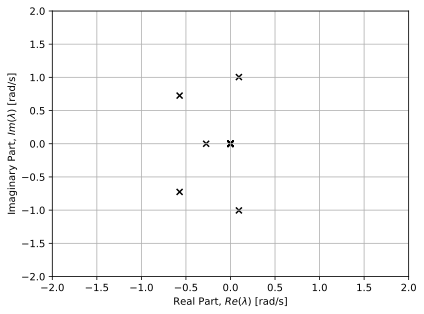

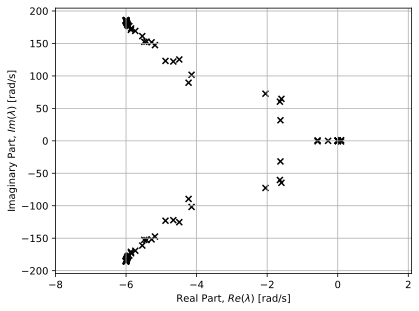

In [6]:
if (analysis_mode == 2) or (analysis_mode == 0):   

    eigenvalues_trim = np.loadtxt('/home/sh2323/sharpy/sharpy/cases/coupled/simple_HALE/output/simple_HALE/stability/aeroelastic_eigenvalues.dat') 
    
    fig = plt.figure()
    plt.scatter(eigenvalues_trim[:, 0], eigenvalues_trim[:, 1],
            marker='x',
            color='k')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid()
    plt.xlabel('Real Part, $Re(\lambda)$ [rad/s]')
    plt.ylabel('Imaginary Part, $Im(\lambda)$ [rad/s]')
    
    fig = plt.figure()
    plt.scatter(eigenvalues_trim[:, 0], eigenvalues_trim[:, 1],
            marker='x',
            color='k')
    plt.xlim(np.min(eigenvalues_trim[:,0])-2, np.max(eigenvalues_trim[:,0])+2)
    plt.ylim(-np.max(eigenvalues_trim[:,1])*1.1, np.max(eigenvalues_trim[:,1])*1.1)
    plt.grid()
    plt.xlabel('Real Part, $Re(\lambda)$ [rad/s]')
    plt.ylabel('Imaginary Part, $Im(\lambda)$ [rad/s]')

In [70]:
rename = 1

if rename == 1:
    import os
    import re
       # Path to the directory containing the files
    directory = '/home/sh2323/sharpy/sharpy/cases/coupled/simple_HALE/output/simple_HALE/stability/modes'

    # Regex pattern to match the filenames
    pattern = re.compile(r'^mode_(\d{6})_phase(\d+)_([A-Za-z0-9]+).vtu$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            print(f"Processing file: {filename}")
            part1, part2, part3 = match.groups()
            new_filename = f"mode_{part1}_{part3}_phase{part2}.vtu"
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} → {new_filename}")


Processing file: mode_000001_phase0003_03.vtu
Renamed: mode_000001_phase0003_03.vtu → mode_000001_03_phase0003.vtu
Processing file: mode_000000_phase0002_01.vtu
Renamed: mode_000000_phase0002_01.vtu → mode_000000_01_phase0002.vtu
Processing file: mode_000005_phase0002_01.vtu
Renamed: mode_000005_phase0002_01.vtu → mode_000005_01_phase0002.vtu
Processing file: mode_000006_phase0000_01.vtu
Renamed: mode_000006_phase0000_01.vtu → mode_000006_01_phase0000.vtu
Processing file: mode_000002_phase0000_01.vtu
Renamed: mode_000002_phase0000_01.vtu → mode_000002_01_phase0000.vtu
Processing file: mode_000002_phase0003_01.vtu
Renamed: mode_000002_phase0003_01.vtu → mode_000002_01_phase0003.vtu
Processing file: mode_000004_phase0002_02.vtu
Renamed: mode_000004_phase0002_02.vtu → mode_000004_02_phase0002.vtu
Processing file: mode_000001_phase0002_00.vtu
Renamed: mode_000001_phase0002_00.vtu → mode_000001_00_phase0002.vtu
Processing file: mode_000001_phase0000_02.vtu
Renamed: mode_000001_phase0000_02.

In [78]:
route_to_case = '../../../../sharpy/cases/coupled/simple_HALE/'
%run '../../../../sharpy/cases/coupled/simple_HALE/generate_hale_custom_krylov.py'

!ls ../../../../sharpy/cases/coupled/simple_HALE/

case_data = sharpy_main.main(['', route_to_case + 'simple_HALE.sharpy'])

__init__.py	      generate_hale_custom.py	      simple_HALE.fem.h5
__pycache__	      generate_hale_custom_krylov.py  simple_HALE.sharpy
generate_hale.py      output
generate_hale_SPI.py  simple_HALE.aero.h5
--------------------------------------------------------------------------------
            ######  ##     ##    ###    ########  ########  ##    ##
           ##    ## ##     ##   ## ##   ##     ## ##     ##  ##  ##
           ##       ##     ##  ##   ##  ##     ## ##     ##   ####
            ######  ######### ##     ## ########  ########     ##
                 ## ##     ## ######### ##   ##   ##           ##
           ##    ## ##     ## ##     ## ##    ##  ##           ##
            ######  ##     ## ##     ## ##     ## ##           ##
--------------------------------------------------------------------------------
Aeroelastics Lab, Aeronautics Department.
    Copyright (c), Imperial College London.
    All rights reserved.
    License available at https://github.com/imperial

/home/sh2323/sharpy/venv/lib/python3.12/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning:

Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.



	state-space model produced in form:
			h_{n+1} = A h_{n} + B u_{n}
			with:
	x_n = h_n + Bp u_n
			...done in 3.05 sec
Scaling UVLM system with reference time 0.008333s
Non-dimensional time step set (2.000000)
System scaled in 2.554896s
Generating an instance of LinearBeam
Variable remove_sym_modes has no assigned value in the settings file.
    will default to the value: False
Variable remove_rigid_states has no assigned value in the settings file.
    will default to the value: False


/home/sh2323/sharpy/venv/lib/python3.12/site-packages/sharpy/linear/src/lingebm.py:313: UserWarning:

Euler parametrisation not implemented - Either rigid body modes are not being used or this method has already been called.



Warning, projecting system with damping onto undamped modes

Linearising gravity terms...
	M = 0.00 kg
	X_CG A -> -0.00 -0.00 -0.00
Node  1 	-> B 0.000 0.000 0.000
			-> A 0.256 0.000 0.000
			-> G 0.256 0.000 -0.008
	Node mass:
		Matrix: 0.0869
Node  2 	-> B 0.000 0.000 0.000
			-> A 0.512 0.000 0.000
			-> G 0.512 0.000 -0.017
	Node mass:
		Matrix: 0.0435
Node  3 	-> B 0.000 0.000 0.000
			-> A 0.769 0.000 0.000
			-> G 0.768 0.000 -0.025
	Node mass:
		Matrix: 0.1370
Node  4 	-> B 0.000 0.000 0.000
			-> A 1.025 0.000 0.000
			-> G 1.024 0.000 -0.033
	Node mass:
		Matrix: 0.0435
Node  5 	-> B 0.000 0.000 0.000
			-> A 1.281 0.000 0.000
			-> G 1.281 0.000 -0.042
	Node mass:
		Matrix: 0.0869
Node  6 	-> B 0.000 0.000 0.000
			-> A 1.537 0.000 -0.000
			-> G 1.537 0.000 -0.050
	Node mass:
		Matrix: 0.0435
Node  7 	-> B 0.000 0.000 0.000
			-> A 1.794 0.000 -0.001
			-> G 1.793 0.000 -0.059
	Node mass:
		Matrix: 0.0869
Node  8 	-> B 0.000 0.000 0.000
			-> A 2.050 0.000 -0.001
			-> G 2

/home/sh2323/sharpy/venv/lib/python3.12/site-packages/sharpy/rom/krylov.py:242: UserWarning:

Reduced Order Model Unstable



Dynamical System Eigenvalues - aeroelastic system



|==============|==============|==============|==============|==============|==============|==============|
|     mode     |  eval_real   |  eval_imag   | freq_n (Hz)  | freq_d (Hz)  |   damping    |  period (s)  |
|==============|==============|==============|==============|==============|==============|==============|
|      0       |   1.783979   |   1.570796   |   0.378306   |   0.250000   |  -0.750527   |   4.000000   |
|      1       |   0.399382   |   0.320689   |   0.081519   |   0.051039   |  -0.779740   |  19.592753   |
|      2       |   0.399382   |  -0.320689   |   0.081519   |   0.051039   |  -0.779740   |  19.592753   |
|      3       |   0.191766   |   0.875856   |   0.142699   |   0.139397   |  -0.213881   |   7.173762   |
|      4       |   0.191766   |  -0.875856   |   0.142699   |   0.139397   |  -0.213881   |   7.173762   |
|      5       |  -0.005727   |   0.242832   |   0.038659   |   0.038648   |   0.023577   |

<Figure size 640x480 with 0 Axes>

<>:12: SyntaxWarning:

invalid escape sequence '\i'

<>:17: SyntaxWarning:

invalid escape sequence '\l'

<>:18: SyntaxWarning:

invalid escape sequence '\l'

<>:30: SyntaxWarning:

invalid escape sequence '\i'

<>:31: SyntaxWarning:

invalid escape sequence '\z'

<>:39: SyntaxWarning:

invalid escape sequence '\i'

<>:40: SyntaxWarning:

invalid escape sequence '\o'

<>:12: SyntaxWarning:

invalid escape sequence '\i'

<>:17: SyntaxWarning:

invalid escape sequence '\l'

<>:18: SyntaxWarning:

invalid escape sequence '\l'

<>:30: SyntaxWarning:

invalid escape sequence '\i'

<>:31: SyntaxWarning:

invalid escape sequence '\z'

<>:39: SyntaxWarning:

invalid escape sequence '\i'

<>:40: SyntaxWarning:

invalid escape sequence '\o'

/tmp/ipykernel_5061/2468383088.py:12: SyntaxWarning:

invalid escape sequence '\i'

/tmp/ipykernel_5061/2468383088.py:17: SyntaxWarning:

invalid escape sequence '\l'

/tmp/ipykernel_5061/2468383088.py:18: SyntaxWarning:

invalid escape sequence '\l'

/tmp/i

Text(0, 0.5, 'Natural Frequency, $\\omega_n$ [rad/s]')

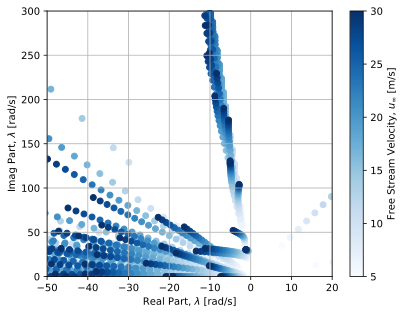

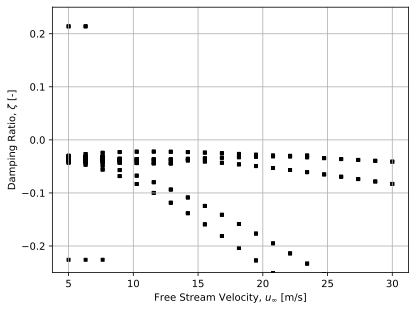

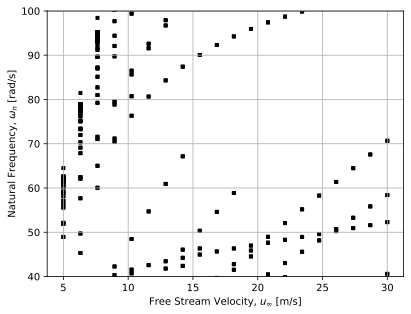

In [80]:
file_name = '../../../../sharpy/cases/coupled/simple_HALE/output/simple_HALE/stability/velocity_analysis_min0050_max0300_nvel0020.dat' 

velocity_analysis = np.loadtxt(file_name)
u_inf = velocity_analysis[:, 0]
eigs_r = velocity_analysis[:, 1]
eigs_i = velocity_analysis[:, 2]


fig = plt.figure()
plt.scatter(eigs_r, eigs_i, c=u_inf, cmap='Blues')
cbar = plt.colorbar()
cbar.set_label('Free Stream Velocity, $u_\infty$ [m/s]')

plt.grid()
plt.xlim(-50, 20)
plt.ylim(0, 300)
plt.xlabel('Real Part, $\lambda$ [rad/s]')
plt.ylabel('Imag Part, $\lambda$ [rad/s]')


fig = plt.figure()
natural_frequency = np.sqrt(eigs_r ** 2 + eigs_i ** 2)
damping_ratio = eigs_r / natural_frequency
cond = (eigs_r>-25) * (eigs_r<10) * (natural_frequency<100) # filter unwanted eigenvalues for this plot (mostly aero modes)

plt.scatter(u_inf[cond], damping_ratio[cond], color='k', marker='s', s=9)

plt.grid()
plt.ylim(-0.25, 0.25)
plt.xlabel('Free Stream Velocity, $u_\infty$ [m/s]')
plt.ylabel('Damping Ratio, $\zeta$ [-]')

fig = plt.figure()
cond = (eigs_r>-25) * (eigs_r<10) # filter unwanted eigenvalues for this plot (mostly aero modes)
plt.scatter(u_inf[cond], natural_frequency[cond], color='k', marker='s', s=9)

plt.grid()
plt.ylim(40, 100)
plt.xlabel('Free Stream Velocity, $u_\infty$ [m/s]')
plt.ylabel('Natural Frequency, $\omega_n$ [rad/s]')

Freestream Sample Index:  2680
Closest Freestream Velocity: 15.526315789473685 m/s 


<>:19: SyntaxWarning:

invalid escape sequence '\l'

<>:20: SyntaxWarning:

invalid escape sequence '\l'

<>:19: SyntaxWarning:

invalid escape sequence '\l'

<>:20: SyntaxWarning:

invalid escape sequence '\l'

/tmp/ipykernel_5061/184193228.py:19: SyntaxWarning:

invalid escape sequence '\l'

/tmp/ipykernel_5061/184193228.py:20: SyntaxWarning:

invalid escape sequence '\l'



Text(0, 0.5, 'Imaginary Part, $Im(\\lambda)$ [rad/s]')

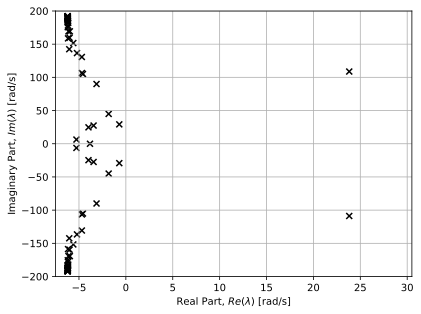

In [84]:
u_inf_sample = 15
q_indx = (np.abs(u_inf - u_inf_sample)).argmin()
print('Freestream Sample Index: ',q_indx)
print('Closest Freestream Velocity:',velocity_analysis[q_indx, 0], 'm/s ')


sampled_indx = np.where(u_inf == velocity_analysis[q_indx, 0])
eigs_r_samp = velocity_analysis[sampled_indx, 1]
eigs_i_samp = velocity_analysis[sampled_indx, 2]


fig = plt.figure()
plt.scatter(eigs_r_samp, eigs_i_samp,
            marker='x',
            color='k')
plt.xlim(-7.5, 30.5)
plt.ylim(-200, 200)
plt.grid()
plt.xlabel('Real Part, $Re(\lambda)$ [rad/s]')
plt.ylabel('Imaginary Part, $Im(\lambda)$ [rad/s]')